## Exploratory Data Analysis (EDA) of Forecasting the Number of Cases of the Top 5 Communicable Diseases in Toronto for the Remaining Months of 2024



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("Communicable disease surveillance data 2017-2024.csv")

### The purpose of this notebok is to perform exploratory data analysis on the dataset to gain a valuable insights into the dataset that will help us in our forecasting. ###

In [3]:
data

,Disease,YTD Cases,January,February,March,April,May,June,July,August,September,October,November,December,Year,MOT
0,AIDS,17,2,1,2,1,5,2,3,1,0,0,0,0,2023,Sexually Transmitted and Bloodborne
1,HIV,732,56,54,55,47,75,70,71,71,47,78,60,48,2023,Sexually Transmitted and Bloodborne
2,Chlamydia,"10,926","1,018",881,"1,131","1,011","1,150","1,310","1,289","1,310",549,428,478,371,2023,Sexually Transmitted and Bloodborne
3,Chancroid,0,0,0,0,0,0,0,0,0,0,0,0,0,2023,Sexually Transmitted and Bloodborne
4,Gonorrhea,"7,215",484,433,524,456,599,694,724,697,697,672,680,555,2023,Sexually Transmitted and Bloodborne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Encephalitis/Meningitis - other,0,0,0,0,0,0,0,0,0,0,0,0,0,2022,Encephalitis/Meningitis
562,Encephalitis/Meningitis - unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,2022,Encephalitis/Meningitis
563,Gastroenteritis,164,1,16,43,31,15,5,9,3,9,5,8,19,2022,Outbreaks
564,Respiratory Infection,"1,303",183,34,60,128,102,58,152,97,84,132,138,135,2022,Outbreaks


### We also need to see if our data and clean and can be suitable for time series forecasting. ###

In [4]:
data.isnull().sum()

Disease       0
YTD Cases     0
January       0
February      0
March         0
April        74
May          74
June         74
July         74
August       74
September    74
October      74
November     74
December     75
Year          0
MOT           0
dtype: int64

### So the null values above is from the year 2024 because our data for year 2024 only has January to March 2024  ###

In [5]:
data.fillna(0,inplace=True)

### Our data set is not clean because the data type for the monthly columns are object so we need to convert them to int so we can do some analysis ###

In [6]:
data.dtypes

Disease      object
YTD Cases    object
January      object
February     object
March        object
April        object
May          object
June         object
July         object
August       object
September    object
October      object
November     object
December     object
Year          int64
MOT          object
dtype: object

In [7]:
columns_to_convert = ['YTD Cases', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data[columns_to_convert] = data[columns_to_convert].replace({',': '', '' '-': '0'}, regex=True).fillna('0').astype(int)

In [8]:
monthly_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_cases = data[monthly_columns].mean()

### Now that we have a cleaned data set we can now extract the top 6 disease with the highest number of cases in 2024 ###

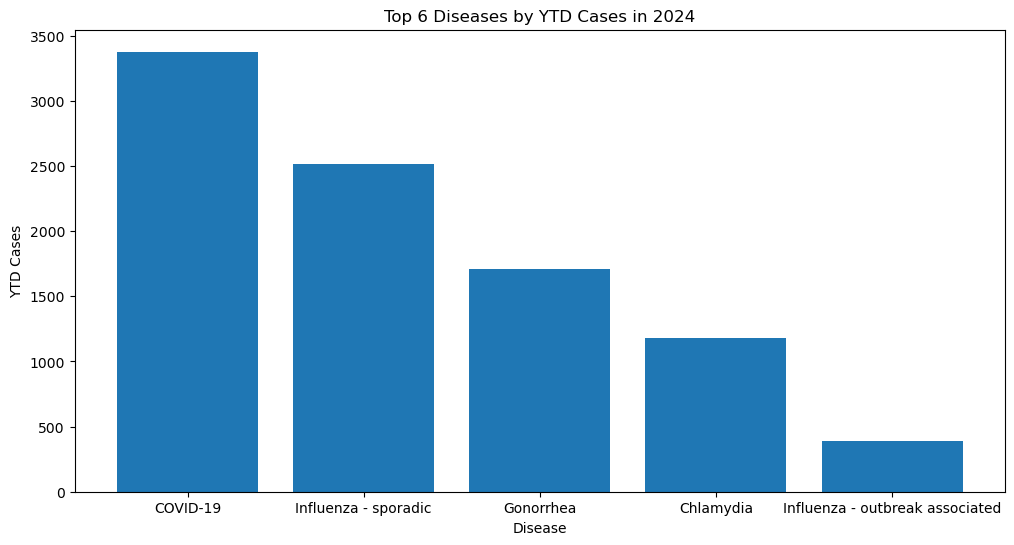

In [10]:
data_2024 = data[data['Year'] == 2024]
data_2024

top_5_diseases_2024 = data_2024.nlargest(5, 'YTD Cases')

plt.figure(figsize=(12, 6))
plt.bar(top_5_diseases_2024['Disease'], top_5_diseases_2024['YTD Cases'])
plt.title('Top 6 Diseases by YTD Cases in 2024')
plt.xlabel('Disease')
plt.ylabel('YTD Cases')
plt.show()

### The visualization above shows the top 5 diseases by YTD (Year-To-Date) cases in 2024. You might be wondering why we are only displaying the top 6 diseases for the year 2024 and not the whole dataset. The main reason for this is that the primary goal of this project is to forecast the number of cases for the year 2024. By focusing on the diseases with the highest number of cases in just the first three months of the year (January-March), we can identify which diseases have the highest potential for an outbreak 